In [107]:
!pip install plotly matplotlib

    100% |################################| 12.6MB 1.1MB/s 
    100% |################################| 61kB 4.0MB/s 
    100% |################################| 952kB 5.6MB/s 


In [2]:
import plotly
plotly.tools.set_credentials_file(username='cgddrd', api_key='F7STNJas2eDGiBpOva9a')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../data/raw/ga.csv', header=0)
df.head()


,date,category,metric,value
0,2017-12-04,Branded Search,app_store,65
1,2017-12-04,Branded Search,complete_quote,437
2,2017-12-04,Branded Search,save_quote,165
3,2017-12-04,Branded Search,start_quote,491
4,2017-12-04,Branded Search,visitors,901


In [143]:
data = df.groupby(['metric'])['value'].sum().sort_values(ascending=False)

'visitors'

In [128]:
import plotly.plotly as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = data.values
phases = data.index.values

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)', 'rgb(35,154,2)']

In [129]:
n_phase = len(phases)
 
# the fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

In [130]:
height = section_h * n_phase + section_d * (n_phase-1)
 
shapes = []
 
label_y = []
 
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)

In [136]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

In [137]:
data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [156]:
data = df.groupby(['metric'])['value'].sum().sort_values(ascending=False)
data = data[~data.index.str.contains("app_store")]
data

import plotly.plotly as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = data.values
phases = data.index.values

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)', 'rgb(35,154,2)']

n_phase = len(phases)
 
# the fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

height = section_h * n_phase + section_d * (n_phase-1)
 
shapes = []
 
label_y = []
 
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)
    
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [159]:
data = df.groupby(['metric'])['value'].sum().sort_values(ascending=False)
data = data[['visitors','app_store']]
data

import plotly.plotly as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = data.values
phases = data.index.values

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)', 'rgb(35,154,2)']

n_phase = len(phases)
 
# the fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

height = section_h * n_phase + section_d * (n_phase-1)
 
shapes = []
 
label_y = []
 
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)
    
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [191]:
grouped_seg = df.groupby(['metric', 'category'])["value"].sum().sort_values(ascending=False).reset_index()
grouped_seg

,metric,category,value
0,visitors,Generic Search,118062
1,visitors,Paid search,66905
2,start_quote,Generic Search,37415
3,complete_quote,Generic Search,29696
4,visitors,Direct Traffic,27966
5,start_quote,Paid search,23565
6,visitors,Referral link,21405
7,complete_quote,Paid search,17662
8,visitors,Organic,14404
9,start_quote,Referral link,11900


In [192]:
grouped_seg = grouped_seg.groupby('metric').apply(
    lambda f: f.groupby('category').apply(
        lambda g: g['value'].values
    ))
grouped_seg



category,Branded Search,Direct Traffic,Generic Search,Organic,Paid search,Referral link
metric,,,,,,
app_store,[637],[793],[4231],[1328],[1361],[1361]
complete_quote,[4543],[1427],[29696],[4604],[17662],[10383]
save_quote,[1824],[690],[11003],[1719],[4300],[6049]
start_quote,[5223],[1730],[37415],[5264],[23565],[11900]
visitors,[10884],[27966],[118062],[14404],[66905],[21405]


In [193]:
grouped_seg['sum'] = df.groupby('metric')['value'].sum()
grouped_seg

grouped_seg = grouped_seg.sort_values('sum', ascending=False).drop('sum', axis=1) 
# grouped_seg = grouped_seg.T
grouped_seg


category,Branded Search,Direct Traffic,Generic Search,Organic,Paid search,Referral link
metric,,,,,,
visitors,[10884],[27966],[118062],[14404],[66905],[21405]
start_quote,[5223],[1730],[37415],[5264],[23565],[11900]
complete_quote,[4543],[1427],[29696],[4604],[17662],[10383]
save_quote,[1824],[690],[11003],[1719],[4300],[6049]
app_store,[637],[793],[4231],[1328],[1361],[1361]


In [194]:
# grouped = df.groupby(['category'])["value"].sum().sort_values(ascending=False)

# grouped_seg = df.groupby(['category', 'metric'])["value"].sum().sort_values(ascending=False).reset_index()

# #grouped_seg = grouped_seg.groupby('category').apply(lambda f: f['value'].values.tolist()).to_dict()

# # group by 
# grouped_seg = grouped_seg.groupby('category').apply(
#     lambda f: f.groupby('metric').apply(
#         lambda g: g['value'].values
#     ))

# df_rows = list(grouped_seg.iterrows())
# grouped_seg

In [195]:
total = grouped.values
total


array([200407, 113793,  51098,  32606,  27319,  23111])

In [196]:
grouped_seg.index.tolist()


['visitors', 'start_quote', 'complete_quote', 'save_quote', 'app_store']

In [200]:
n_phase, n_seg = (5, 6)


In [201]:
plot_width = 600
unit_width = plot_width / total[0]
 
phase_w = [int(value * unit_width) for value in total]
 
# height of a section and difference between sections 
section_h = 100
section_d = 10

# shapes of the plot
shapes = []
 
# plot traces data
data = []
 
# height of the phase labels
label_y = []

In [202]:
height = section_h * n_phase + section_d * (n_phase-1)

# rows of the DataFrame
df_rows = list(grouped_seg.iterrows())

# iteration over all the phases
for i in range(n_phase):
    # phase name
    row_name = df.index[i]
    
    # width of each segment (smaller rectangles) will be calculated
    # according to their contribution in the total users of phase
    seg_unit_width = phase_w[i] / total[i]
    seg_w = [int(df_rows[i][1][j] * seg_unit_width) for j in range(n_seg)]
    
    # starting point of segment (the rectangle shape) on the X-axis
    xl = -1 * (phase_w[i] / 2)
    
    # iteration over all the segments
    for j in range(n_seg):
        # name of the segment
        seg_name = grouped_seg.columns[j]
        
        # corner points of a segment used in the SVG path
        points = [xl, height, xl + seg_w[j], height, xl + seg_w[j], height - section_h, xl, height - section_h]
        path = 'M {0} {1} L {2} {3} L {4} {5} L {6} {7} Z'.format(*points)
        
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[j],
                'line': {
                    'width': 1,
                    'color': colors[j]
                }
        }
        shapes.append(shape)
        
        # to support hover on shapes
        hover_trace = go.Scatter(
            x=[xl + (seg_w[j] / 2)],
            y=[height - (section_h / 2)],
            mode='markers',
            marker=dict(
                size=min(seg_w[j]/2, (section_h / 2)),
                color='rgba(255,255,255,1)'
            ),
            text="Segment : %s" % (seg_name),
            name="Value : %d" % (grouped_seg[seg_name][row_name])
        )
        data.append(hover_trace)
        
        xl = xl + seg_w[j]

    label_y.append(height - (section_h / 2))

    height = height - (section_h + section_d)

In [203]:
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=grouped_seg.index.tolist(),
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data.append(label_trace)
 
# For phase values (total)
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=total,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data.append(value_trace)

In [205]:
layout = go.Layout(
    title="<b>Segmented Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    hovermode='closest',
    shapes=shapes,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [87]:
grouped_seg

metric,app_store,complete_quote,save_quote,start_quote,visitors
category,,,,,
Generic Search,[4231],[29696],[11003],[37415],[118062]
Paid search,[1361],[17662],[4300],[23565],[66905]
Referral link,[1361],[10383],[6049],[11900],[21405]
Direct Traffic,[793],[1427],[690],[1730],[27966]
Organic,[1328],[4604],[1719],[5264],[14404]
Branded Search,[637],[4543],[1824],[5223],[10884]


In [88]:
grouped_seg.index

Index(['Generic Search', 'Paid search', 'Referral link', 'Direct Traffic',
       'Organic', 'Branded Search'],
      dtype='object', name='category')

In [90]:
grouped_seg.columns

Index(['app_store', 'complete_quote', 'save_quote', 'start_quote', 'visitors'], dtype='object', name='metric')

In [98]:
grouped_seg.iloc[0]

metric
app_store           [4231]
complete_quote     [29696]
save_quote         [11003]
start_quote        [37415]
visitors          [118062]
Name: Generic Search, dtype: object

In [114]:
grouped_seg['app_store']

category
Generic Search    [4231]
Paid search       [1361]
Referral link     [1361]
Direct Traffic     [793]
Organic           [1328]
Branded Search     [637]
Name: app_store, dtype: object

In [162]:
grouped_seg = grouped_seg.T

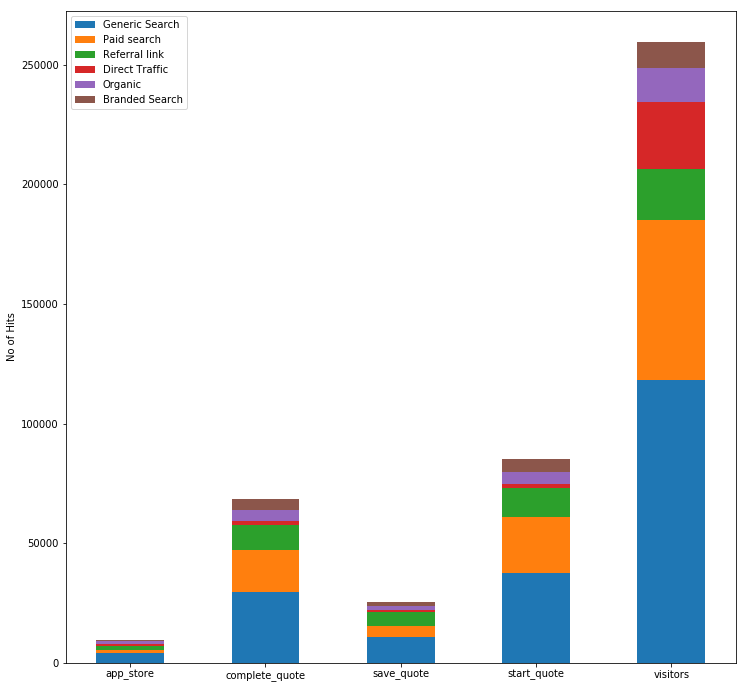

In [163]:
grouped_seg.T
import matplotlib.pyplot as plt

ind = np.arange(len(grouped_seg.index))

plt.figure(figsize=(12, 12))
width = 0.5   

i = 0
ny = len(grouped_seg[grouped_seg.columns[0]])
cum_size = np.zeros(ny)

for column in grouped_seg:
    
    data = np.concatenate(grouped_seg[column].values, axis=0)
    plt.bar(ind, data, width, bottom=cum_size, label=column)
    
    cum_size += data

plt.ylabel('No of Hits')
plt.xticks(ind, grouped_seg.index)
plt.legend()
plt.show()